# Bangalore Restaurants Analysis
  dataset credit : Chanakya Vivek Kapoor, Machine Learning Researcher at DSC-VIT Gurugram     Haryana,India

In this notebook, we analyse the restaurants which are located in the 'Silicon Valley' of India i.e Bengalore. There are various columns present in the dataset and we will through them. I have used various types of charts for visualizations and have plotted certain locations on the map using GeoPy and Folium. Don't miss to check them out.

In [ ]:
## les's start with importing necessary libraries 
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("zomato.csv")

In [ ]:
data.describe()

In [ ]:
data.head(10)

In [ ]:
data.info()

In [ ]:
data.columns

In [ ]:
data['listed_in(city)'].unique()

As our aim is to get a fair idea about the factors affecting the establishment of different types of restaurant at different places in Bengaluru, i will remove certain columns that are not of much help to us. First we will remove 'url' column as it does not play a major role. 'Address' can also be removed because 'location' is a much easier and better feature to analyze as compared to 'address'. 'Phone' will also be removed.

As we can observe the 'location' field offers more precise location as compared to the column 'listed_in(city)' column, we will use the 'location' column.

In [ ]:
data = data.drop(['url', 'address', 'phone', 'listed_in(city)'], axis=1, inplace = True )

In [ ]:
data.isna().sum()

In [ ]:
data.shape

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def missing_values(data, thresh = 20, color = 'black', edgecolor = 'black', height = 3, width = 15):
    
    plt.figure(figsize = (width, height))
    percentage = (data.isnull().mean()) * 100
    percentage.sort_values(ascending = False).plot.bar(color = color, edgecolor = edgecolor)
    plt.axhline(y = thresh, color = 'r', linestyle = '-')
    
    plt.title('Missing values percentage per column', fontsize = 20, weight = 'bold' )
    
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh + 12.5, f'Columns with more than {thresh}% missing values', fontsize = 12, color = 'crimson',
         ha = 'left' ,va = 'top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, f'Columns with less than {thresh}% missing values', fontsize=12, color='green',
         ha = 'left' ,va = 'top')
    plt.xlabel('Columns', size = 15, weight = 'bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight = 'bold')
    
    return plt.show()

In [ ]:
missing_values(data, thresh = 20, color = sns.color_palette('Reds',15))

removing the 'dish_liked' column as it contains more than 50% missing values.

In [ ]:
data.drop(['dish_liked'], axis = 1, inplace = True)

In [ ]:
missing_values(data, thresh = 20, color = sns.color_palette('Reds',15))

For the null values present in the 'rate' column, we will replace them with the mode of the 'rate' column. We can not remove this column, because we won't have any dependent column left with us once we remove it.

In [ ]:
data['rate'] = data['rate'].fillna(data['rate'].mode()[0])

In [ ]:
missing_values(data, thresh = 20, color = sns.color_palette('Reds',15))

let's remove the rows having null values for the above column

In [ ]:
previous_data = data
data.dropna(inplace = True)

In [ ]:
missing_values(data, thresh = 20, color = sns.color_palette('Reds',15))

In [ ]:
data.isna().sum()

removed all null values in the dataset

In [ ]:
data.shape

In [ ]:
print("Number of rows present in the dataset are: ", data.shape[0])
print("Number of columns present in the dataset are: ", data.shape[1])

# Rating Distribution

In [ ]:
data['rate'].value_counts()

as we can see a category named 'new' which indicates that the restaurant is fairly new, hence we will replace the value 'new' with '2.5' as it can be mode as well as bad..we don't know that yet. Please note we will replace with '2.5 /5' for maintaing uniform format.

In [ ]:
print("rate column type: ", type(data['rate'][0]))

In [ ]:
data['rate'].replace({"NEW" : "2.5 /5"}, inplace = True)

In [ ]:
data['rate'].unique()

In [ ]:
data.loc[data['rate'] == '-'].head(5)

There are about 65 such rows, we will drop these 65 rows because the value for 'rate' column is '-'

In [ ]:
a = data.loc[data['rate'] == '-'].index
data.drop(a, axis = 0, inplace = True)

In [ ]:
data['rate'].unique()

Now we can see all the unique values present are scores out of 5. But still there is a problem which we have not solved.

The problem is that the given scores are out of 5 and that the data type is string. So first we will need to store only the scores and then convert into float datatype.

In [ ]:
data['rate'] = data['rate'].apply(lambda x : x.split('/')[0])

In [ ]:
data['rate'].unique()

For some values, there is still a blank after the end of the string like '3.4 '. We will need to remove such spaces.

In [ ]:
data['rate'] = data['rate'].apply(lambda x : x.split(' ')[0])

In [ ]:
data['rate'].unique()

Perfect, after performing all the above steps we can finally convert the column values from string to float datatype.

In [ ]:
data = data.astype({'rate' : float})
print(data['rate'].dtype)

successfully converted the 'rate' column values to float

In [ ]:
plt.figure(figsize = (10, 10))
sns.distplot(data['rate'], color = 'red')

As discussed before '2.5' represents the 'NEW' restaurants, and there were about 9800 restaurants that were NEW, that's why the above distribution is multi-modal. If we ignore the 'NEW' Restaurants we can observe that the graph resembles bell-shape i.e it's normally distributed.

In [ ]:
plt.figure(figsize = (10, 10))
sns.countplot(data['rate'], color = 'crimson')

Maximum of the restaurants are pretty NEW. Apart from the recently opened restaurants, most of the Restaurants received 3.9 rating, followed by 3.7 and 3.8. Only a few restaurants have 4.8 or 4.9 rating. Let's see which are these restaurants.

In [ ]:
print("Restaurants having the highest ratings are: \n", data.loc[(data['rate'] == 4.8) | (data['rate'] == 4.9)]['name'].unique())

As expected, these are restaurant chains that are present all around the globe. These restaurants are pretty amazing that's why they have the highest rating.

Note: The one restaurant having such a large name must have been parsed incorrectly by the creator.

# Name

The same restaurant chain can be present at different location. Let's first check the number of unique restaurant present in the city.

In [ ]:
print("Total number of restaurants in Bengaluru are: ", len(data['name'].unique()))

Let's see which restaurant have the highest number of outlets across the city.

Before we use code to find out, let's guess first which kind of restaurants can have the highest number of outlets. Most probably some coffe chain, or ice-cream chain or sweet shop or famous pizza chain like Dominos or Pizza Hut will be having the maximum number of outlets.

In [ ]:
plt.figure(figsize = (6, 6))
data['name'].value_counts().head(10)
index = data['name'].value_counts().head(10).index
values = data['name'].value_counts().head(10).values
g = sns.barplot(x = index, y = values, data = data)
g.set_xticklabels(labels = index, rotation = 90)
g

Cafe Coffee Day(a coffee chain) had the maximum number of outlets. Sweet shops like Kanti sweet or pizza chains like Pizza Hut also have a lot of outlets across the city.

Having a large number of outlets does not gurantee a higher rating. Let's see which restaurant chain have the highest rating grouping by their name.

In [ ]:
data.groupby('name')['rate'].mean().sort_values(ascending = False).head(15)

We can see that the top 15 restaurants by ratings are completely different from those which have the highest number of outlets.

In [ ]:
data.groupby('name')['votes', 'rate'].max().sort_values(ascending = False, by = 'votes').head(15)

Above are the 15 restaurants that have got the highest number of user votes. The ratings for these restaurants are also very high as expected. More votes most probably leads to better rating.

In [ ]:
names = data.groupby('name')['rate'].mean().sort_values(ascending = False).head(15).index
locations = []
for i in names:
    loc = []
    locations.append(data.loc[data['name'] == i]['location'].unique().tolist())
name_location = dict(zip(names, locations))
name_location

Above is a list of the top 15 restaurants by rating and the locations where they are present.

# Online Order

In [ ]:
data['online_order'].unique()

The unique values for 'online_order' columns are 'Yes' or 'No'. These values needs to be converted to numerical 1 or 0.

In [ ]:
data['online_order'].replace({'Yes' : 1, 'No' : 0}, inplace = True)
# Converting to integer data type.

In [ ]:
plt.figure(figsize = (6, 6))
sns.countplot(data['online_order'], color = 'brown')

In [ ]:
correlation = data.corr()['rate'].sort_values(ascending = False).to_frame().head(10)

cmap = sns.light_palette("cyan", as_cmap = True)

s = correlation.style.background_gradient(cmap = cmap)

s

Correlation of 'rating' with 'online_table' is 0.242.

In [ ]:
sns.boxplot(x = 'online_order', y = 'rate', data = data)

We can observe from the above plot that those restaurants which offer online order has a higher median rating as compared to those restaurants that don't.

As IQR for restaurants offering online order is much less than that of restaurants not offering online order, we can say that restaurants offering online order has better ratings in general.

It makes sense also because Zomato offers home delivery for online orders also, so more people will give rating for online_order restaurants on their platform.

# Book Table

In [ ]:
data['book_table'].unique()

Again we will need to change 'Yes' or 'No' to 1 or 0 respectively.

In [ ]:
data['book_table'].replace({'Yes' : 1, 'No' : 0}, inplace = True)
# Converting to integer data type.

In [ ]:
correlation = data.corr()['rate'].sort_values(ascending = False).to_frame().head(10)

cmap = sns.light_palette("red", as_cmap = True)

s = correlation.style.background_gradient(cmap = cmap)

s

Book_table has a correlation of 0.39 with the ratings given.

In [ ]:
plt.figure(figsize = (7, 7))
sns.countplot(data['book_table'], color = 'lightgreen')

only around 7500 restaurants books a table in advance. Rest of the 43000 restaurants don't book table in advance. Let's see if this affects the rating of the restaurant.

In [ ]:
sns.boxplot(x = 'book_table', y = 'rate', data = data)

Eventhough there are some outliers for the book_table class, we can see that the lower whisker of '1''s boxplots which represents the minimum rating of the restaurants that book table in advance, is greater than the 50th percentile value or the median of the ratings of the restaurants that don't book table in advance.

Some restaurants that don't book table in advance also have ratings close to 5. The IQR for '1' boxplot is quite small which represents small variation of the ratings around median. Therefore, if the restaurants offer to book table in advance, more ratings are given.

# Approx Cost

Votes contains total number of rating for the restaurant.

In [ ]:
print("Data type for Approximate cost is: ", data['approx_cost(for two people)'].dtype)

We have to convert it into integer.

There are values like '1,200' we need to first convert such strings to '1200' then to 1200.

In [ ]:
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].apply(lambda x : x.replace(',', ''))

In [ ]:
data = data.astype({'approx_cost(for two people)' : int})
print(data['approx_cost(for two people)'].dtype)

In [ ]:
correlation = data.corr()['rate'].sort_values(ascending = False).to_frame().head(10)

cmap = sns.light_palette("pink", as_cmap = True)

s = correlation.style.background_gradient(cmap = cmap)

s

In [ ]:
data.groupby('name')['rate', 'approx_cost(for two people)'].mean().sort_values(by = 'rate', ascending = False).head(15)

We can observe some of the top-rated restaurants are quite expensive. Punjab Grill costs 1000 per person, whereas Taaza Thindi costs 50 per person.

Let's see the distribution of this feature.

In [ ]:
plt.figure(figsize = (8, 8))
sns.distplot(data['approx_cost(for two people)'])

Let's see which is the most expensive restaurant.

In [ ]:
data['approx_cost(for two people)'].sort_values(ascending = False)

In [ ]:
print("The name of the most expensive restaurant is {} and it is located at {}".format(
    data.loc[data['approx_cost(for two people)'] == data['approx_cost(for two people)'].max()]['name'].unique()[0],
    data.loc[data['approx_cost(for two people)'] == data['approx_cost(for two people)'].max()]['location'].unique()[0]
))

In [ ]:
data['approx_cost(for two people)'].sort_values(ascending = False).head(15).unique()

Top 15 restaurants cost ran range from 4000 to 6000 Rupees for two people

# Cuisines

In [89]:
data['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In order to analyse the cuisine column, let's make a new column called 'Number_of_cuisines_offered'.

In [91]:
len(data['cuisines'][4].split(','))

2

In [92]:
data['Number_of_cuisines_offered'] = data['cuisines'].apply(lambda x : len(x.split(',')))

In [94]:
data.corr()

,online_order,book_table,rate,votes,approx_cost(for two people),Number_of_cuisines_offered
online_order,1.000000,-0.002504,0.242004,0.034114,-0.084069,0.106474
book_table,-0.002504,1.000000,0.391537,0.405981,0.618064,0.263471
rate,0.242004,0.391537,1.000000,0.406135,0.404836,0.247356
votes,0.034114,0.405981,0.406135,1.000000,0.381563,0.231998
approx_cost(for two people),-0.084069,0.618064,0.404836,0.381563,1.000000,0.268651
Number_of_cuisines_offered,0.106474,0.263471,0.247356,0.231998,0.268651,1.000000


In [95]:
correlation = data.corr()['rate'].sort_values(ascending = False).to_frame().head(10)

cmap = sns.light_palette("orange", as_cmap = True)

s = correlation.style.background_gradient(cmap = cmap)

s

,rate
rate,1
votes,0.406135
approx_cost(for two people),0.404836
book_table,0.391537
Number_of_cuisines_offered,0.247356
online_order,0.242004


Number of cuisines offered have very little correlation with the rating.

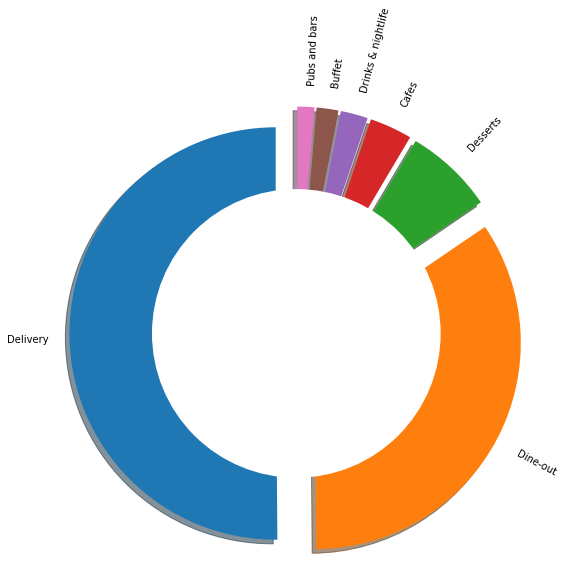

In [96]:
# Pie chart
labels = data['listed_in(type)'].value_counts().index
sizes = data['listed_in(type)'].value_counts().values
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
fig1, ax1 = plt.subplots(figsize = (8, 8))

ax1.pie(sizes, labels = labels,
        shadow = True, startangle = 90, explode = explode, rotatelabels = True)
centre_circle = plt.Circle((0, 0), 0.70,fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

Majority of the restaurants Delivers the food to the homes, very less proportion are pubs and bars or Drinks & nightlife.

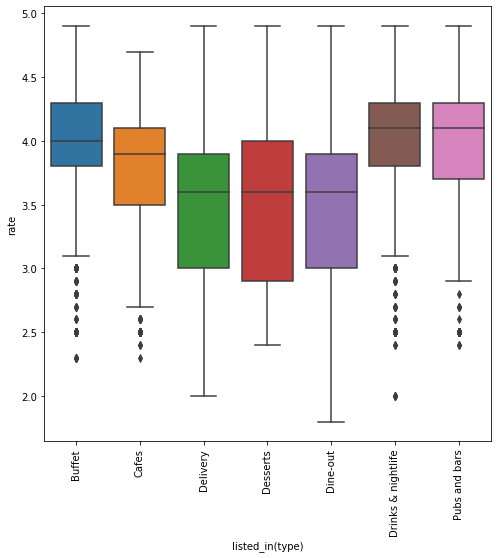

In [97]:
plt.figure(figsize = (8, 8))
g = sns.boxplot(x = 'listed_in(type)', y = 'rate', data = data)
plt.xticks(rotation = 90)
plt.show()

Majority of the Restaurants of type 'Drinks & nightlife' and 'Pubs and bars' have a high median rating. The median value of these kind of restaurants is greater than the 75th Percentile value of rest of the restaurant types except that of 'Buffet' type. The IQR is highest for 'Desserts' category which indicates large amount of variation about median.

Hope you liked the notebook, any suggestions would be highly appreciated.